In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from re import search

Preliminary Analysis

Importing the dataset

In [2]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,'Dataset')
df = pd.read_csv(os.path.join(dataset_dir,'fake_or_real_news.csv'))

In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (6335, 4)


In [4]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [6]:
df['label'] = df['label'].map({'REAL': 0, 'FAKE': 1})

In [7]:
df.label.value_counts()

0    3171
1    3164
Name: label, dtype: int64

In [8]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [9]:
unnamed_columns = [col for col in df.columns if search(r'^Unnamed', col)]

df = df.drop(unnamed_columns, axis=1)

df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [10]:
print("Dataset shape:", df.shape)

Dataset shape: (6335, 4)


In [11]:
news = 'text'
headline = 'title'

Cleaning the data

Checking for missing data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6335 non-null   int64 
 1   title   6335 non-null   object
 2   text    6335 non-null   object
 3   label   6335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 198.1+ KB


In [13]:
df.label.value_counts()

0    3171
1    3164
Name: label, dtype: int64

This confirms that 0 label is used for true news and 1 label is used for fake news

In [14]:
print('Dataset null values:\n',df.isna().sum())

Dataset null values:
 id       0
title    0
text     0
label    0
dtype: int64


In [15]:
def show_tf_distribution(df, column) :
    null = df[df[column].isna()]
    total = len(null)
    notfake_cnt = list(null[null['label']==0].shape)[0]
    fake_cnt = list(null[null['label']==1].shape)[0]
    
    print('Null Values distribution for \''+column+'\' on basis for realness')
    print('Total:\t',total)
    print('Real %:\t',format(((notfake_cnt/total)*100),'.2f'))
    print('Fake %:\t',format(((fake_cnt/total)*100),'.2f'))

In [ ]:
show_tf_distribution(df, news)

In [ ]:
show_tf_distribution(df, headline)

As every instance of missing value almost always indicates a fake news article, missing value/information can be an identifying factor. Hence not dropping rows with null values.

Checking for placeholder values and duplicates

In [17]:
headline_value_counts = df[headline].value_counts()
headline_value_counts[headline_value_counts > 1]

OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
                                                                                                     ..
Iraqis in Mosul Find US Missiles at Captured Islamic State Base                                       2
Media Roll Out Welcome Mat for ‘Humanitarian’ War in Syria                                            2
The Israeli Trumpess                                                                                  2
The Story of How the DOJ Tried to Thwart an FBI Investigation In

In [18]:
duplicate_headline_list = set(headline_value_counts[headline_value_counts > 1].keys())
df_dup_headline = df[df[headline].isin(duplicate_headline_list)]
df_dup_headline

,id,title,text,label
25,636,Anti-Trump forces seek last-ditch delegate revolt,Washington (CNN) The faction of the GOP that i...,0
66,4410,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,0
174,7661,"Syrian War Report – November 2, 2016: ISIS and...",Trump Whistles His Dogs ‹ › South Front Analys...,1
271,9625,The Fix Is In: NBC Affiliate Accidentally Post...,"NBC affiliate WRCB TV in Chattanooga, Tennesse...",1
345,739,"Do Democrats Want What Bernie Wants, Or Just W...","Do Democrats Want What Bernie Wants, Or Just W...",0
...,...,...,...,...
6231,9542,Schools All Over America Are Closing On Electi...,"in: Politics , Sleuth Journal , Special Intere...",1
6233,7171,North Korea Threatens ‘Sacred’ Nuclear War Aga...,Email \nNorth Korea’s Foreign Ministry slammed...,1
6303,7437,The Deceptive Nature of Hillary Clinton is Rig...,Posted by David Risselada \nMuch to the surpri...,1
6307,9013,US abstains from UN vote calling for end to Cu...,US abstains from UN vote calling for end to Cu...,1


In [19]:
df_dup_headline[df_dup_headline.duplicated()]

,id,title,text,label


There are no duplicated rows that needs to be deleted

In [20]:
df_dup_headline[df_dup_headline.duplicated([news])]

,id,title,text,label
1492,2697,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,0
1954,4544,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,0
2336,4396,Obamacare Enrollees Anxiously Await Supreme Co...,"“I’ve got my six-month, regular cancer checkup...",0
2856,2664,Donald Trump is blatantly racist — and the med...,"Donald Trump, the actual Republican candidate ...",0
2952,7550,"Black Agenda Report for Week of Oct 31, 2016","News, information and analysis from the black ...",1
3081,4160,The College Loan Bombshell Hidden in the Budget,In obscure data tables buried deep in its 2016...,0
3292,3056,This astonishing chart shows how moderate Repu...,Political scientists have known for years that...,0
3301,1762,OnPolitics | 's politics blog,Who has Trump appointed to his cabinet so far?...,0
3324,2399,Senate GOP prepared to replace Obamacare subsi...,"Killing Obama administration rules, dismantlin...",0
4140,2261,We Republicans Lost On Gay Rights. That’s A Go...,I’m not among those Republicans who have “evol...,0


There are 30 rows with duplicated text

In [21]:
df_dup_headline[df_dup_headline.duplicated([headline, news])]

,id,title,text,label
1492,2697,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,0
1954,4544,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,0
2336,4396,Obamacare Enrollees Anxiously Await Supreme Co...,"“I’ve got my six-month, regular cancer checkup...",0
2856,2664,Donald Trump is blatantly racist — and the med...,"Donald Trump, the actual Republican candidate ...",0
2952,7550,"Black Agenda Report for Week of Oct 31, 2016","News, information and analysis from the black ...",1
3081,4160,The College Loan Bombshell Hidden in the Budget,In obscure data tables buried deep in its 2016...,0
3292,3056,This astonishing chart shows how moderate Repu...,Political scientists have known for years that...,0
3301,1762,OnPolitics | 's politics blog,Who has Trump appointed to his cabinet so far?...,0
3324,2399,Senate GOP prepared to replace Obamacare subsi...,"Killing Obama administration rules, dismantlin...",0
4140,2261,We Republicans Lost On Gay Rights. That’s A Go...,I’m not among those Republicans who have “evol...,0


There are 30 rows with both headlines and news duplicated. These needs to be removed.

In [22]:
df_dup_headline[df_dup_headline[news] == ' ']

,id,title,text,label


We can leave duplicate headlines as that is a common part of news when it undergoes revision but those instances where both headline and news articles are same needs to be dropped. Rows without news will also be removed.

Checking news for whitespaces.

In [23]:
df[df[news] == ' ']

,id,title,text,label
106,5530,The Arcturian Group by Marilyn Raffaele Octobe...,,1
710,8332,MARKETWATCH LEFTIST: MSM’s “Blatant” Anti Trum...,,1
806,9314,Southern Poverty Law Center Targets Anti-Jihad...,,1
919,10304,Refugee Resettlement Watch: Swept Away In Nort...,,1
940,9474,Michael Bloomberg Names Technological Unemploy...,,1
1664,5802,Alert News : Putins Army Is Coming For World W...,,1
1736,9564,An LDS Reader Takes A Look At Trump Accuser Je...,,1
1851,5752,America’s Senator Jeff Sessions Warns of Worse...,,1
1883,8816,Paris Migrant Campers Increase after Calais Is...,,1
1941,7525,Putins Army is coming for World war 3 against ...,,1


Replacing white spaces with null.

In [24]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [25]:
df.isna().sum()

id        0
title     0
text     36
label     0
dtype: int64

This shows that there is increase in null values in column news as we replace articles that only had null values.

In [26]:
show_tf_distribution(df, news)

Null Values distribution for 'text' on basis for realness
Total:	 36
Real %:	 0.00
Fake %:	 100.00


The distribution shows that all null news values still point to fake news. As these values are small compared to total dataset size, dropping them might be preferable.

Removing Duplicated Data

In [27]:
len(df)

6335

Dropping rows with no news article or headlines

In [28]:
df_clean = df.dropna(subset=[headline,news])

In [29]:
len(df_clean)

6299

Dropping rows with same headline and news articles

In [30]:
df_clean = df_clean.drop_duplicates([headline, news], ignore_index=True)

In [31]:
len(df_clean)

6270

Dropping rows with same news articles

In [32]:
df_clean = df_clean.drop_duplicates([news], ignore_index=True)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059 entries, 0 to 6058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6059 non-null   int64 
 1   title   6059 non-null   object
 2   text    6059 non-null   object
 3   label   6059 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 189.5+ KB


In [34]:
df_clean.isna().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [35]:
len(df) - len(df_clean)

276

In [36]:
df_clean.label.value_counts()

1    3070
0    2989
Name: label, dtype: int64

Summary

276 rows of data removed on basis of not having information in news column, headline column and or having duplicate values.

Exploring the dataset

Helper Function

In [37]:
graph_dir = os.path.join(cwd,'Graphs')

In [38]:
def show_hist_for_col(df, column, title):
    """
    Display a histogram for a column in a dataframe, splitting the data by label.
    """
    plt.figure(figsize=(12,8))
    df[df.label == 0][column].hist(label='True')
    df[df.label == 1][column].hist(alpha=0.4, label='Fake')
    plt.title(title)
    plt.legend()
    plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
    plt.show()
    plt.close()

Distribution of Labels

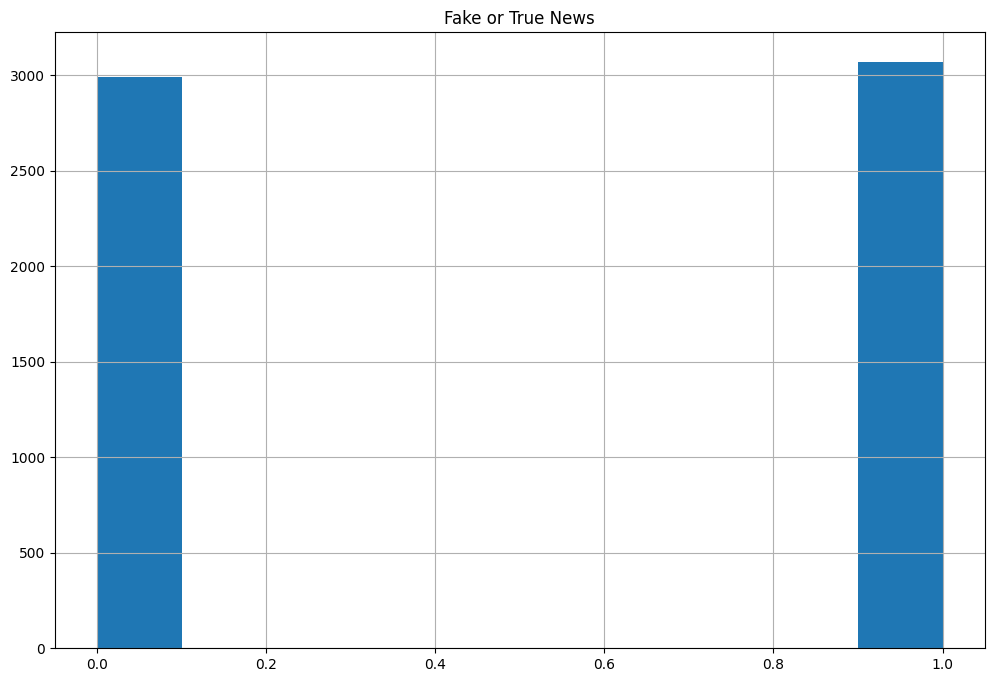

In [39]:
plt.figure(figsize=(12,8))
df_clean.label.hist()
title = 'Fake or True News'
plt.title(title)
plt.savefig(os.path.join(graph_dir,title+'.png'), bbox_inches='tight')
plt.show()
plt.close()

After cleaning the data there is an imbalance present but hopefully not enough to have effect on the models

Length of Headlines

In [40]:
df_clean['headline_len'] = df_clean[headline].str.len()

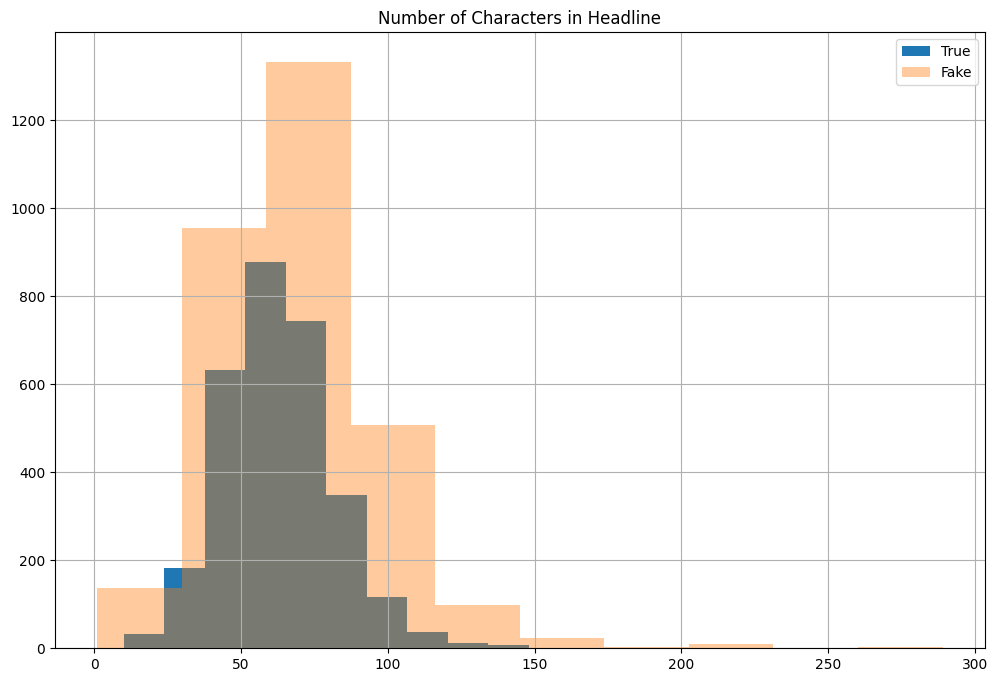

In [41]:
show_hist_for_col(df_clean, 'headline_len', 'Number of Characters in Headline')

In [42]:
df_clean[df_clean.label == 0].headline_len.describe()

count    2989.000000
mean       62.593510
std        18.678381
min        10.000000
25%        50.000000
50%        62.000000
75%        74.000000
max       148.000000
Name: headline_len, dtype: float64

In [43]:
df_clean[df_clean.label == 1].headline_len.describe()

count    3070.000000
mean       69.189902
std        27.157892
min         1.000000
25%        51.000000
50%        68.000000
75%        84.000000
max       289.000000
Name: headline_len, dtype: float64

Fake news stories have a wider range in the length of title than True news stories. The quartile differences between fake news articles is much larger than in case of true news article.

Length of News article

In [44]:
df_clean['news_len'] = df_clean[news].str.len()

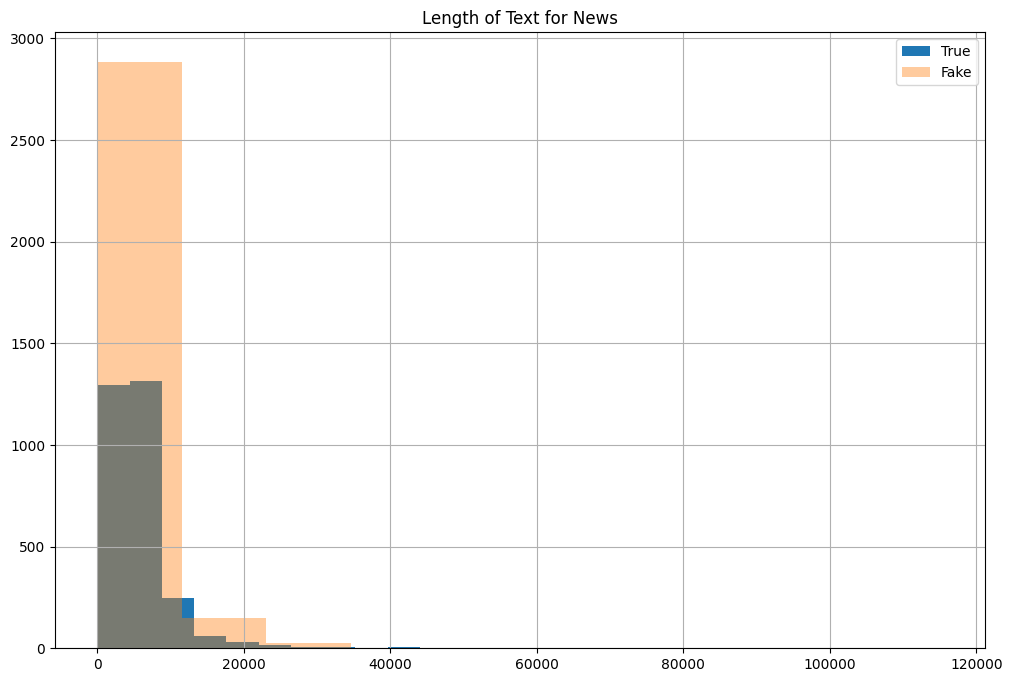

In [45]:
show_hist_for_col(df_clean, 'news_len', 'Length of Text for News')

In [46]:
df_clean[df_clean.label == 0].news_len.describe()

count     2989.000000
mean      5581.124122
std       4294.500944
min         43.000000
25%       3062.000000
50%       4841.000000
75%       6971.000000
max      44039.000000
Name: news_len, dtype: float64

In [47]:
df_clean[df_clean.label == 1].news_len.describe()

count      3070.000000
mean       4201.697720
std        5720.561079
min          12.000000
25%        1322.250000
50%        2622.000000
75%        5115.750000
max      115372.000000
Name: news_len, dtype: float64

In [48]:
df_long = df_clean[df_clean.news_len > 10000]

In [49]:
df_long

,id,title,text,label,headline_len,news_len
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",1,11,13333
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0,63,13863
15,4739,How women lead differently,"As more women move into high offices, they oft...",0,26,19036
40,1967,Both parties want to craft populist messages f...,Presidential hopefuls in both parties agree on...,0,53,10071
50,3027,American politics has reached peak polarization,"For a long time in American politics, we've be...",0,47,23121
...,...,...,...,...,...,...
6026,9621,Here Are Six ‘Miracle’ Drugs Big Pharma Now Re...,Here Are Six ‘Miracle’ Drugs Big Pharma Now Re...,1,62,11695
6034,3825,How the Obama White House runs foreign policy,When Susan E. Rice took over as President Obam...,0,45,21491
6046,10200,List of Republicans opposing Trump | OffGuardian,"Charlie Baker , Massachusetts (2015–present)[3...",1,48,17642
6055,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,59,14323


In [50]:
df_long.label.value_counts()

1    245
0    241
Name: label, dtype: int64

ok there does not seem to be bias in long stories towards either type of articles so they will be kept. also fake news article have shown much higher max story size and significantly lower quartile scores across the board.

Capital letters in headline.

In [51]:
df_clean['caps_in_headline'] = df_clean[headline].apply(lambda headline: sum(1 for char in headline if char.isupper()))

In [52]:
df_clean

,id,title,text,label,headline_len,news_len,caps_in_headline
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,28,7518,5
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2646,18
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,43,2543,2
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,84,2660,6
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,48,1840,8
...,...,...,...,...,...,...,...
6054,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,69,4076,5
6055,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,59,14323,9
6056,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,66,11974,7
6057,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,67,6991,5


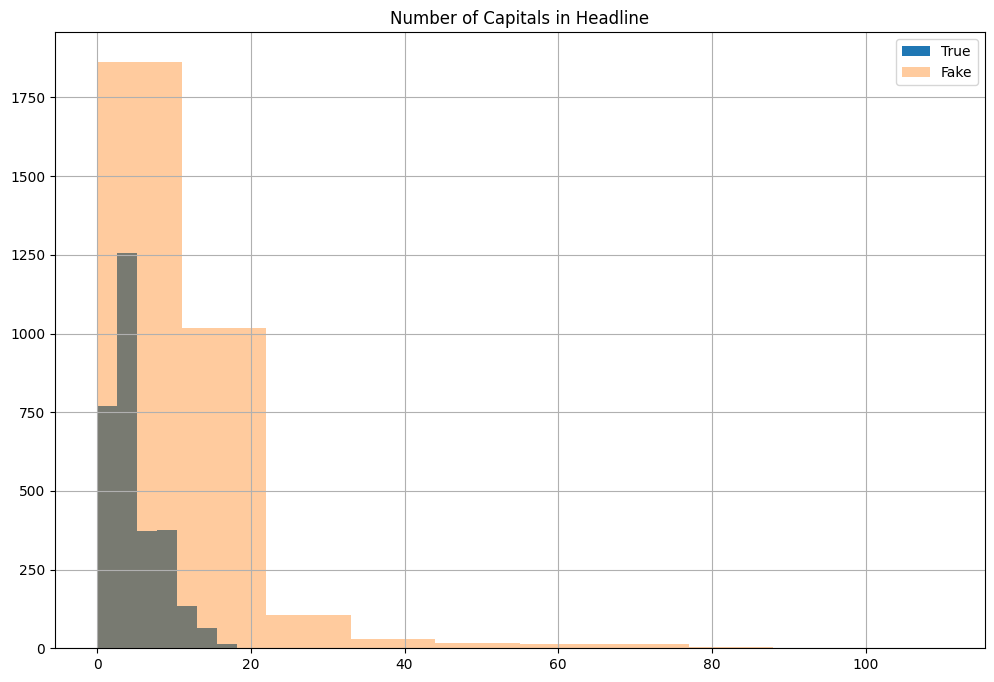

In [53]:
show_hist_for_col(df_clean, 'caps_in_headline', 'Number of Capitals in Headline')

In [54]:
df_clean[df_clean.label == 0].caps_in_headline.describe()

count    2989.000000
mean        4.843091
std         3.246222
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        26.000000
Name: caps_in_headline, dtype: float64

In [55]:
df_clean[df_clean.label == 1].caps_in_headline.describe()

count    3070.000000
mean       10.614984
std         9.407693
min         0.000000
25%         5.000000
50%         9.000000
75%        13.000000
max       110.000000
Name: caps_in_headline, dtype: float64

There is much more deviation in number of Capital letter in headline in fake news articles. also fake news articles have much more amount of Capital letter in headline.

In [56]:
df_clean['norm_caps_in_headline'] = df_clean['caps_in_headline'] / df_clean['headline_len']

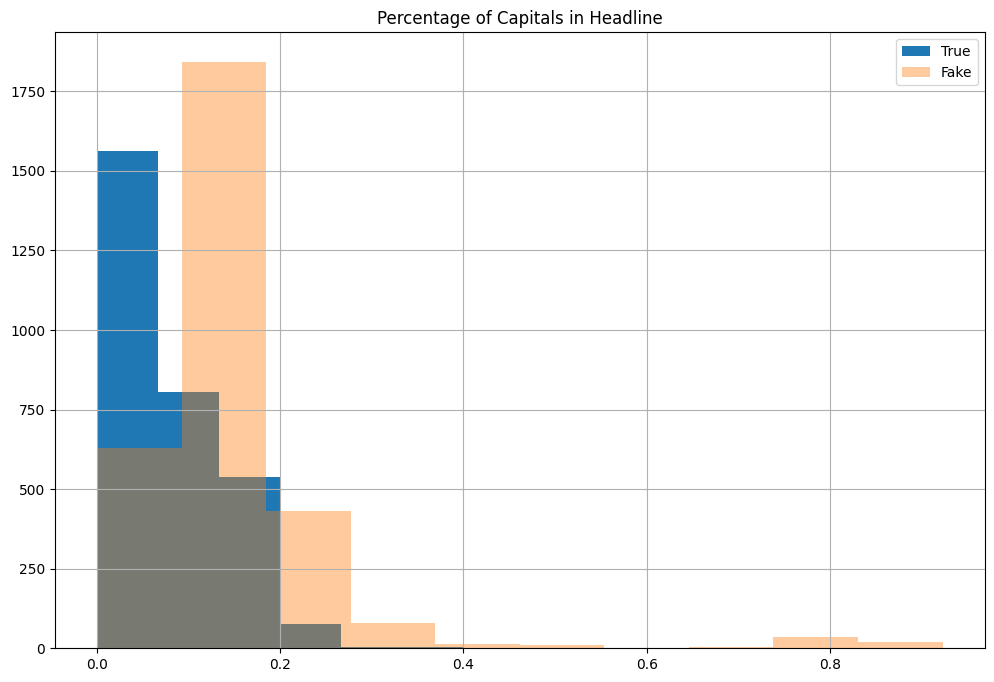

In [57]:
show_hist_for_col(df_clean, 'norm_caps_in_headline', 'Percentage of Capitals in Headline')

In [58]:
df_clean[df_clean.label == 0].norm_caps_in_headline.describe()

count    2989.000000
mean        0.081292
std         0.053872
min         0.000000
25%         0.040541
50%         0.063291
75%         0.121212
max         0.666667
Name: norm_caps_in_headline, dtype: float64

In [59]:
df_clean[df_clean.label == 1].norm_caps_in_headline.describe()

count    3070.000000
mean        0.153352
std         0.116351
min         0.000000
25%         0.105798
50%         0.141101
75%         0.172840
max         0.923077
Name: norm_caps_in_headline, dtype: float64

percentage of capitals may be useful as even first quartile of percentage of capitals in fake news is larger than even third quartile in true news article. but this might not be generalizable

Capital in news article

In [60]:
df_clean['caps_in_news'] = df_clean[news].apply(lambda news: sum(1 for char in news if char.isupper()))

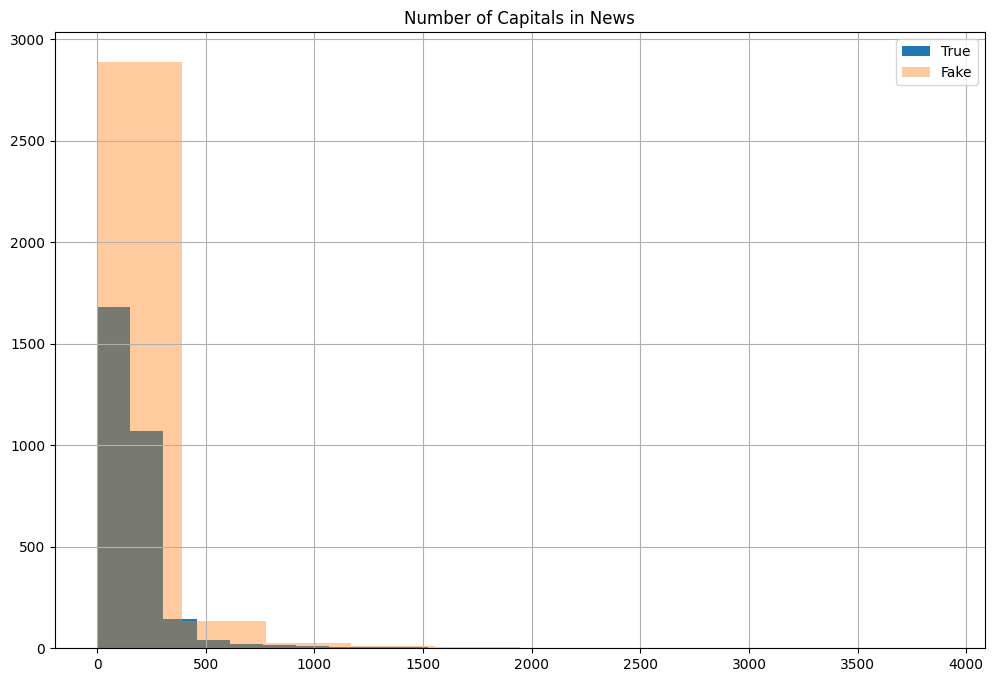

In [61]:
show_hist_for_col(df_clean, 'caps_in_news', 'Number of Capitals in News')

In [62]:
df_clean[df_clean.label == 0].caps_in_news.describe()

count    2989.000000
mean      167.921713
std       143.723958
min         1.000000
25%        91.000000
50%       141.000000
75%       206.000000
max      1523.000000
Name: caps_in_news, dtype: float64

In [63]:
df_clean[df_clean.label == 1].caps_in_news.describe()

count    3070.000000
mean      150.802932
std       206.059915
min         0.000000
25%        51.000000
50%        99.000000
75%       179.750000
max      3891.000000
Name: caps_in_news, dtype: float64

In [64]:
df_clean['norm_caps_in_news'] = df_clean['caps_in_news'] / df_clean['news_len']

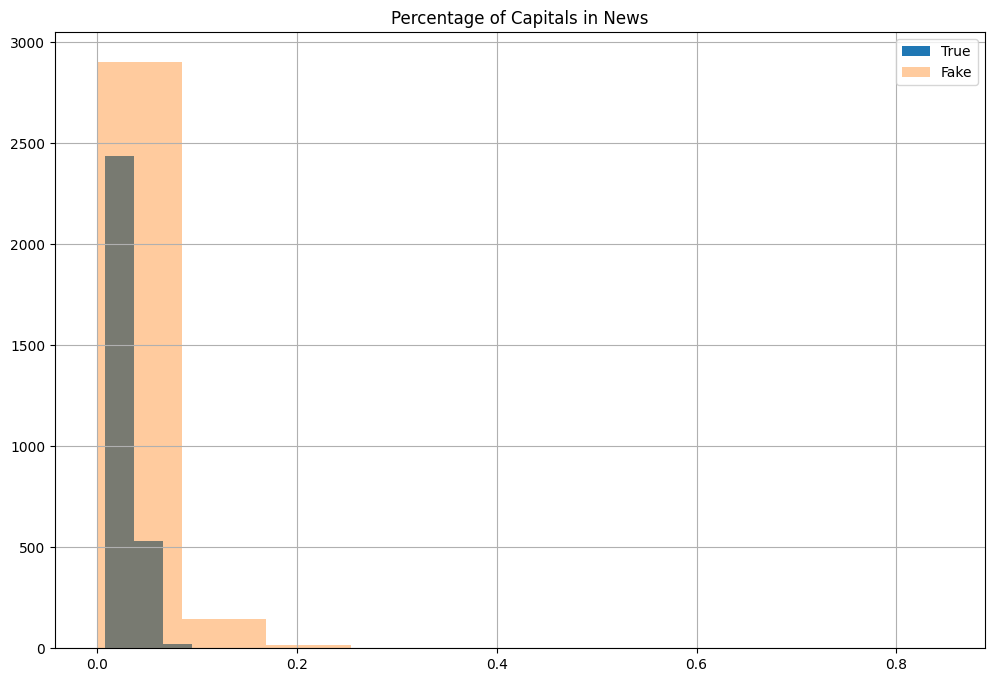

In [65]:
show_hist_for_col(df_clean, 'norm_caps_in_news', 'Percentage of Capitals in News')

In [66]:
df_clean[df_clean.label == 0].norm_caps_in_news.describe()

count    2989.000000
mean        0.031098
std         0.010777
min         0.008264
25%         0.025330
50%         0.029963
75%         0.035181
max         0.297271
Name: norm_caps_in_news, dtype: float64

In [67]:
df_clean[df_clean.label == 1].norm_caps_in_news.describe()

count    3070.000000
mean        0.043491
std         0.037737
min         0.000000
25%         0.028113
50%         0.036372
75%         0.047867
max         0.846154
Name: norm_caps_in_news, dtype: float64

There is a lot of overlap in number of capitals in news article between fake and real news.

In [68]:
def check_string_for(substring, fullstring):
    """Check if the substring is in the fullstring"""
    if search(substring, fullstring):
        return True
    else:
        return False

Via and Image Via in article

In [69]:
df_via = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' via', news_text))]

In [70]:
df_via

,id,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2646,18,0.211765,96,0.036281
28,691,Pure chaos: Donald Trump’s campaign management...,If you want a glimpse into a presidential cand...,0,119,3522,3,0.025210,62,0.017604
41,431,First Take: Wall Street bids goodbye to June hike,NEW YORK -- Bye bye June rate hike. That was t...,0,49,2768,5,0.102041,113,0.040824
67,3648,FBI checking if Orlando shooter's wife knew at...,The wife of the gunman who carried out the dea...,0,78,8236,4,0.051282,249,0.030233
103,4933,Where is Gary Johnson?,(CNN) Conservatives dissatisfied with Donald T...,0,22,7558,3,0.136364,243,0.032151
...,...,...,...,...,...,...,...,...,...,...
6013,9817,President Elect Trump – A New Era of Unpredict...,President Elect Trump – A New Era of Unpredict...,1,60,6320,8,0.133333,221,0.034968
6014,7900,Duterte Pulls a 180: China to Build Fake Islan...,Duterte Pulls a 180: China to Build Fake Islan...,1,75,3808,10,0.133333,148,0.038866
6015,2776,Treasury will begin issuing Iran sanctions wai...,WASHINGTON — President Obama signed an order S...,0,68,4915,3,0.044118,125,0.025432
6035,4515,"ISIS claims responsibility for Garland, Texas,...",(CNN) ISIS has claimed responsibility for the ...,0,55,5481,6,0.109091,213,0.038862


In [71]:
df_via['label'].value_counts()

1    283
0    165
Name: label, dtype: int64

Via is much more indicative of fake news article compared to true news article.

In [72]:
df_image_via = df_clean[df_clean[news].apply(lambda news_text: check_string_for('image via', news_text))]

In [73]:
df_image_via

,id,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2646,18,0.211765,96,0.036281
262,6768,Anderson Cooper Absolutely OWNS Kellyanne Conw...,"\nIn case you missed it, on Sunday, FBI Dire...",1,87,1316,21,0.241379,55,0.041793
416,8146,Young Turks Finds Out Why Trump Is About To Lo...,"By Wes Williams Election 2016 , Politics , Vid...",1,103,2802,23,0.223301,142,0.050678
534,7147,Trump Team Begins Making List Of Executive Ord...,\nIn what amounts to the first pang of just ...,1,90,2062,15,0.166667,54,0.026188
858,7480,President Obama’s Interview With Samantha Bee ...,"\nPresident Obama is known for his humor, bu...",1,97,1403,19,0.195876,45,0.032074
866,7127,Former GOP Representative Calls For Armed Insu...,Former GOP Representative Calls For Armed Insu...,1,62,3353,14,0.225806,162,0.048315
1245,10120,Obama Meets Boy After Deplorable Trump Fans At...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,94,1540,15,0.159574,92,0.059740
1515,6001,Republican Mark Kirk Just Lost His Race Agains...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,100,2161,20,0.200000,91,0.042110
1800,5396,BREAKING: AP Finds Proof Melania Trump Illegal...,\nIn what may be the last bombshell to drop ...,1,90,2538,28,0.311111,64,0.025217
1930,9937,Obama Administration Smacks Down Enlistment Bo...,\nFor those of us too ensnared in the Trumps...,1,99,1899,12,0.121212,65,0.034229


In [74]:
df_image_via['label'].value_counts()

1    31
Name: label, dtype: int64

With all the posts with image via being Fake, it's highly indicative of that label, but this may be particular to this dataset and may not generalize.

Said in news article

In [75]:
df_said = df_clean[df_clean[news].apply(lambda news_text: check_string_for('said', news_text))]

In [76]:
df_said

,id,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,43,2543,2,0.046512,96,0.037751
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",1,73,3171,14,0.191781,67,0.021129
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0,63,13863,3,0.047619,557,0.040179
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,0,71,4296,1,0.014085,132,0.030726
10,1357,"With all three Clintons in Iowa, a glimpse at ...","CEDAR RAPIDS, Iowa — “I had one of the most wo...",0,97,3166,5,0.051546,99,0.031270
...,...,...,...,...,...,...,...,...,...,...
6053,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,1,64,2572,4,0.062500,72,0.027994
6054,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,69,4076,5,0.072464,148,0.036310
6056,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,66,11974,7,0.106061,434,0.036245
6057,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,67,6991,5,0.074627,234,0.033472


In [77]:
df_said['label'].value_counts()

0    2362
1    1439
Name: label, dtype: int64

The stories containing the word said are indicative of the news story being true. With twice as many of the "true" news stories containing said vs. "fake", the true ones must seem likely to be more concerned with providing quotations, or at least quotations in this style.

On in news article

In [78]:
df_on = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' on ', news_text))]

In [79]:
df_on

,id,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,28,7518,5,0.178571,314,0.041766
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,85,2646,18,0.211765,96,0.036281
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,43,2543,2,0.046512,96,0.037751
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,84,2660,6,0.071429,139,0.052256
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,48,1840,8,0.166667,77,0.041848
...,...,...,...,...,...,...,...,...,...,...
6054,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,69,4076,5,0.072464,148,0.036310
6055,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,59,14323,9,0.152542,476,0.033233
6056,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,66,11974,7,0.106061,434,0.036245
6057,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,67,6991,5,0.074627,234,0.033472


In [80]:
df_on.label.value_counts()

0    2835
1    2635
Name: label, dtype: int64

The use of 'on' is fairly balanced although somewhat indicative of a 'true' story.

You in news article

In [81]:
df_you = df_clean[df_clean[news].apply(lambda news_text: check_string_for(' you ', news_text))]

In [82]:
df_you

,id,title,text,label,headline_len,news_len,caps_in_headline,norm_caps_in_headline,caps_in_news,norm_caps_in_news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,28,7518,5,0.178571,314,0.041766
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,48,1840,8,0.166667,77,0.041848
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",1,73,3171,14,0.191781,67,0.021129
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0,63,13863,3,0.047619,557,0.040179
12,7041,"Strong Solar Storm, Tech Risks Today | S0 News...",Click Here To Learn More About Alexandra's Per...,1,66,1445,14,0.212121,83,0.057439
...,...,...,...,...,...,...,...,...,...,...
6048,4214,Bernie Sanders says private meeting with Pope ...,ROME — U.S. Democratic presidential candidate...,0,75,6239,4,0.053333,149,0.023882
6050,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,1,80,3924,12,0.150000,115,0.029307
6051,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,1,83,3077,32,0.385542,192,0.062398
6053,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,1,64,2572,4,0.062500,72,0.027994


In [83]:
df_you.label.value_counts()

0    1398
1    1396
Name: label, dtype: int64

You is present in both true and fake news stories with a bit more mention in fake news stories which might be due to a more informal writing approach.

Save the Cleaned Dataset

In [84]:
df_clean.to_csv(os.path.join(dataset_dir,'train_news_cleaned.csv'),index=False)